## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-whitegrid')


## Import a mini-version of the dataset for exploration

In [4]:
df_train =  pd.read_csv('./data/train.csv', nrows = 2_000_000, parse_dates=["pickup_datetime"])

In [5]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


### Look at statistical features of the dataset

In [6]:
df_trainaintraintraintraintrain.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


### Pre-processing

Take care of negative fare-amounts

In [8]:
df_train = df_train[df_train.fare_amount > 0]

Taking care of nulls

In [9]:
df_train = df_train.dropna(how = 'any', axis = 'rows')

Taking care of latitude and longitude

In [10]:
BBox = (-75.0367, -72.2116, 39.8416, 41.8223)

In [11]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [12]:
df_train = df_train[select_within_boundingbox(df_train, BBox)]

In [13]:
df_train.describeribe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.998521e+06,1.998521e+06,1.998521e+06,1.998521e+06,1.998521e+06,1.998521e+06
mean,1.134659e+01,-7.256779e+01,3.998036e+01,-7.257001e+01,3.998104e+01,1.683971e+00
std,9.849662e+00,1.010471e+01,5.550209e+00,1.009393e+01,5.548935e+00,1.314781e+00
min,1.000000e-02,-7.503468e+01,-5.633330e-01,-7.502775e+01,-1.485050e-01,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073495e+01,-7.399141e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398182e+01,4.075264e+01,-7.398018e+01,4.075314e+01,1.000000e+00
75%,1.250000e+01,-7.396716e+01,4.076711e+01,-7.396373e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,5.517580e-01,4.174689e+01,2.882130e-01,4.171463e+01,2.080000e+02


## Histogram for distribution of fares

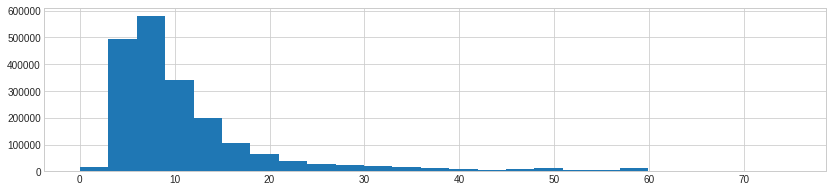

In [16]:
df_train[df_train.fare_amount<75].fare_amount.hist(bins=25, figsize=(14,3))

### Haversine Formula

In [17]:
def hav_distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [18]:
df_train['distance_miles'] = hav_distance(df_train.pickup_latitude, df_train.pickup_longitude, \
                                      df_train.dropoff_latitude, df_train.dropoff_longitude)

## Histogram for distribution of distance

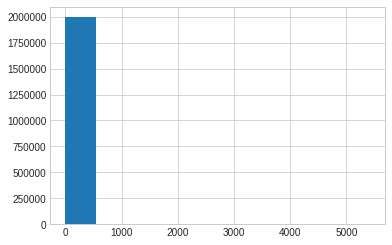

In [26]:
df_train.distance_miles.hist(bins=10)

In [20]:
df_train.distance_miles.describe()

count    1.998521e+06
mean     1.190797e+01
std      2.259821e+02
min      0.000000e+00
25%      7.536552e-01
50%      1.314918e+00
75%      2.410462e+00
max      5.414386e+03
Name: distance_miles, dtype: float64

### Influence of passenger count

In [27]:
df_train.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

,distance_miles,fare_amount
passenger_count,,
0,47.134594,8.862578
1,11.893946,11.223928
2,11.339941,11.818159
3,11.581366,11.532483
4,15.458811,11.748433
5,9.054083,11.206567
6,17.098586,12.159408
9,8.106351,104.000000
208,0.000000,3.300000


Remove 0 distance trips

In [28]:
df_train = df_train[df_train.distance_miles >= 0.05]

In [29]:
df_train.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

,distance_miles,fare_amount
passenger_count,,
0,48.233672,8.858676
1,12.324470,11.176296
2,11.686885,11.787887
3,11.939664,11.527957
4,15.926919,11.720009
5,9.387491,11.232918
6,17.588094,12.204698
9,8.106351,104.000000
